# 第10章: ベクトル空間法 (II)

第10章では，前章に引き続き単語ベクトルの学習に取り組む．

## 90. word2vecによる学習

81で作成したコーパスに対して[word2vec](https://code.google.com/archive/p/word2vec/)を適用し，単語ベクトルを学習せよ．さらに，学習した単語ベクトルの形式を変換し，86-89のプログラムを動かせ．

[gensim](https://radimrehurek.com/gensim/models/word2vec.html)

fasttext ←使いやすいらしい？

In [1]:
from gensim.models.word2vec import Word2Vec, LineSentence
import os

In [2]:
sentences = LineSentence('../chapter09/work/r100corpus_combined_country.txt')

In [3]:
def load_model(file):
    if not os.path.isfile(file):
        sentences = LineSentence('../chapter09/work/r100corpus_combined_country.txt')
        model = Word2Vec(sentences, size=300)
        model.save(file)
    else:
        model = Word2Vec.load(file)
        
    return model

In [4]:
model = load_model('work/word2vec.model')

#### 86. 単語ベクトルの表示
"United States"のベクトルを表示

In [5]:
model.wv['United_States']

array([-0.39918524,  1.6275082 , -0.03158157, -1.0508264 ,  0.7450633 ,
        0.08392487, -0.6631644 , -1.3627996 , -1.193642  , -0.1304013 ,
        0.91712755, -0.29565075,  1.233774  , -1.3295834 , -1.0218163 ,
        0.43762198,  0.39496797, -0.02275567, -0.3512264 , -1.0583937 ,
        0.40810707, -0.17909911, -0.6921544 ,  0.576122  ,  0.43610662,
        0.2877446 , -0.63550216,  0.90449506,  0.5426381 , -1.5173872 ,
       -0.6387959 , -0.24042742,  1.2286286 ,  0.27911547,  0.13098444,
        0.42480892,  0.16086379,  0.48530486, -0.1367446 ,  0.2853525 ,
        1.6760153 ,  0.5585718 , -0.81648093,  0.72065455, -1.3680999 ,
       -0.27830347,  0.4984848 , -1.1917913 ,  1.2749944 ,  0.6301701 ,
        0.91613984,  0.596065  ,  1.6857902 ,  0.22232568,  0.0985966 ,
       -0.32705802,  0.3481155 , -0.02558036, -1.1109737 ,  0.47637683,
        0.8352573 , -2.337108  ,  0.26818934, -0.18473868,  0.37938026,
       -0.03181527, -0.79486793,  1.7869661 ,  0.3414846 ,  0.69

#### 87. 単語の類似度
"United States"と"U.S."のコサイン類似度

In [6]:
model.wv.similarity('United_States', 'U.S')

0.8683278

#### 88. 類似度の高い単語10件
"England"とコサイン類似度が高い10語

In [7]:
model.wv.most_similar("England")

[('Wales', 0.7598101496696472),
 ('Scotland', 0.7462948560714722),
 ('Britain', 0.6165431141853333),
 ('Ireland', 0.6139339208602905),
 ('Hampshire', 0.5881649851799011),
 ('London', 0.5837011337280273),
 ('Liverpool', 0.574505090713501),
 ('Manchester', 0.5709991455078125),
 ('Plymouth', 0.5571392178535461),
 ('Sweden', 0.5500072240829468)]

#### 89. 加法構成性によるアナロジー
vec("Spain") - vec("Madrid") + vec("Athens") と類似度の高い10語

In [8]:
model.wv.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])

[('Egypt', 0.7569804787635803),
 ('Denmark', 0.7458221912384033),
 ('Austria', 0.7424006462097168),
 ('Russia', 0.7321890592575073),
 ('Italy', 0.7285626530647278),
 ('Greece', 0.7248588800430298),
 ('Rome', 0.7219451665878296),
 ('Bulgaria', 0.7095447778701782),
 ('Turkey', 0.7076667547225952),
 ('Germany', 0.698089063167572)]

## 91. アナロジーデータの準備

[単語アナロジーの評価データ](https://github.com/svn2github/word2vec/raw/master/questions-words.txt)をダウンロードせよ．このデータ中で": "で始まる行はセクション名を表す．例えば，": capital-common-countries"という行は，"capital-common-countries"というセクションの開始を表している．ダウンロードした評価データの中で，"family"というセクションに含まれる評価事例を抜き出してファイルに保存せよ．

In [9]:
!wget -NP 'data/' http://download.tensorflow.org/data/questions-words.txt

--2019-02-18 11:42:04--  http://download.tensorflow.org/data/questions-words.txt
download.tensorflow.org (download.tensorflow.org) をDNSに問いあわせています... 216.58.197.144
download.tensorflow.org (download.tensorflow.org)|216.58.197.144|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 304 Not Modified
ファイル `data/questions-words.txt' はサーバ側で変更されていませんでした。ダウンロードを省略します。



In [10]:
!/usr/local/bin/pcregrep -M ': family[\S\s]*:' 'data/questions-words.txt' | grep -v ':' > work/family.txt

In [11]:
!wc -l work/family.txt

506 work/family.txt


In [12]:
!head work/family.txt

boy girl brother sister
boy girl brothers sisters
boy girl dad mom
boy girl father mother
boy girl grandfather grandmother
boy girl grandpa grandma
boy girl grandson granddaughter
boy girl groom bride
boy girl he she
boy girl his her


### memo

more_itertools : [split_before](https://more-itertools.readthedocs.io/en/stable/api.html#more_itertools.split_before)  
more_itertools : [with_iter](https://more-itertools.readthedocs.io/en/stable/api.html#more_itertools.with_iter)  
[コードゴルフ](http://golf.shinh.org/)

## 92. アナロジーデータへの適用


91で作成した評価データの各事例に対して，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．このプログラムを85で作成した単語ベクトル，90で作成した単語ベクトルに対して適用せよ．

### 単語共起行列 (Q.85)

In [13]:
import pickle
import json
import numpy as np
from itertools import islice
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
with open('../chapter09/work/r100_compressed_matrix.pickle', 'rb') as fi:
    matrix = pickle.load(fi)
    
with open('../chapter09/work/word2index.json') as fi:
    word2index = json.load(fi)

In [15]:
# word2indexに登場するものにmatrixを絞る (次元数 : 38万 -> 3万)
indices = np.array([i for i in word2index.values()])
matrix = matrix[indices]

# 使う
index2word = {v : k for k, v in word2index.items()}

In [16]:
def most_similar(vec, matrix, index2word):
    sim_vec = cosine_similarity(vec.reshape(1, -1), matrix)[0]
    index = np.argsort(sim_vec)[-1]

    return (index2word[index],  sim_vec[index])

In [17]:
if not os.path.isfile('work/family_score_SVD.txt'):
    with open('work/family.txt') as fi, open('work/family_score_SVD.txt', 'w') as fo:
        for line in tqdm(fi):
            w1, w2, w3, _ = line.rstrip().split()
            
            # 単語が辞書に入っているのか判定
            if all(w in word2index for w in (w1, w2, w3)):
                
                # vecを作る
                vec = matrix[word2index[w2]] - matrix[word2index[w1]] + matrix[word2index[w3]]
                
                # most similarを出す
                word, score = most_similar(vec, matrix, index2word)
                print(line.rstrip(), word, score, file=fo)

↑ 27秒

In [18]:
!head 'work/family_score_SVD.txt'

boy girl brother sister brother 0.961344653391538
boy girl brothers sisters brothers 0.8682660243777793
boy girl dad mom Vivian 0.8530678640077243
boy girl father mother father 0.95541091925705
boy girl grandfather grandmother grandfather 0.8564090037056784
boy girl grandson granddaughter girl 0.6689458228639049
boy girl groom bride girl 0.6200835347546412
boy girl he she he 0.9958318470547459
boy girl his her his 0.997893331133215
boy girl husband wife husband 0.9625226863848895


### word2vec (Q.90)

In [19]:
if not os.path.isfile('work/family_score_word2vec.txt'):
    with open('work/family.txt') as fi, open('work/family_score_word2vec.txt', 'w') as fo:
        for line in fi:
            w1, w2, w3, _ = line.rstrip().split()
            if all(w in model.wv.vocab for w in (w1, w2, w3)):
                word, score = model.wv.most_similar(positive=[w2, w3], negative=[w1], topn=1)[0]
                print(line.rstrip(), word, score, file=fo)

In [20]:
!head 'work/family_score_word2vec.txt'

boy girl brother sister grandmother 0.7366082072257996
boy girl brothers sisters sisters 0.8386819958686829
boy girl dad mom boyfriend 0.8005956411361694
boy girl father mother mother 0.8703224062919617
boy girl grandfather grandmother uncle 0.8384405374526978
boy girl grandson granddaughter granddaughter 0.8561803102493286
boy girl groom bride Dadaji 0.6848305463790894
boy girl he she she 0.7835911512374878
boy girl his her her 0.6596901416778564
boy girl husband wife wife 0.7216916680335999


### memo

`f'{評価} {評価}'`

## 93. アナロジータスクの正解率の計算

92で作ったデータを用い，各モデルのアナロジータスクの正解率を求めよ．

In [21]:
def accuracy(file):
    correct, total = 0, 0
    
    with open(file) as fi:
        for line in fi:
            _, _, _, gold, predict, score = line.strip().split()
            
            total += 1
            if gold == predict:
                correct += 1
                
    return correct / total

In [22]:
accuracy('work/family_score_SVD.txt')

0.04093567251461988

In [23]:
accuracy('work/family_score_word2vec.txt')

0.5025

### memo

`from sklearn.metrics import accuracy_score`

## 94. WordSimilarity-353での類似度計算

[The WordSimilarity-353 Test Collection](http://www.cs.technion.ac.il/~gabr/resources/data/wordsim353/)の評価データを入力とし，1列目と2列目の単語の類似度を計算し，各行の末尾に類似度の値を追加するプログラムを作成せよ．このプログラムを85で作成した単語ベクトル，90で作成した単語ベクトルに対して適用せよ．

In [24]:
!wget -NP data http://www.cs.technion.ac.il/~gabr/resources/data/wordsim353/wordsim353.zip

--2019-02-18 11:42:19--  http://www.cs.technion.ac.il/~gabr/resources/data/wordsim353/wordsim353.zip
www.cs.technion.ac.il (www.cs.technion.ac.il) をDNSに問いあわせています... 132.68.32.15
www.cs.technion.ac.il (www.cs.technion.ac.il)|132.68.32.15|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 304 Not Modified
ファイル `data/wordsim353.zip' はサーバ側で変更されていませんでした。ダウンロードを省略します。



In [25]:
if not os.path.exists('data/wordsim353'):
    !unzip -d data data/wordsim353.zip

In [26]:
!head 'data/wordsim353/combined.tab'

Word 1	Word 2	Human (mean)
love	sex	6.77
tiger	cat	7.35
tiger	tiger	10.00
book	paper	7.46
computer	keyboard	7.62
computer	internet	7.58
plane	car	5.77
train	car	6.31
telephone	communication	7.50


### 85と90一緒にやる

In [27]:
def cos_sim(v1, v2): 
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2) + 1e-12)

In [28]:
fi = open('data/wordsim353/combined.tab')
fo1 = open('work/wordsim_SVD.txt', 'w')
fo2 = open('work/wordsim_word2vec.txt', 'w')

for idx, line in enumerate(fi):
    if idx != 0:
        w1, w2, _ = line.rstrip().split()
        if w1 in word2index and w2 in word2index:
            score1 = cos_sim(matrix[word2index[w1]], matrix[word2index[w2]])
            score2 = model.wv.similarity(w1, w2)
            print(line.rstrip(), score1, file=fo1)
            print(line.rstrip(), score2, file=fo2)
fi.close()
fo1.close()
fo2.close()

## 95. WordSimilarity-353での評価

94で作ったデータを用い，各モデルが出力する類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [29]:
from scipy.stats import spearmanr

In [30]:
scores_human, scores_SVD, scores_word2vec = [], [], []
with open('work/wordsim_SVD.txt') as fi1, open('work/wordsim_word2vec.txt') as fi2:
    for line1, line2 in zip(fi1, fi2):
        _, _, score_human, score_SVD = line1.rstrip().split()
        _, _, _, score_word2vec = line2.rstrip().split()
        scores_human.append(float(score_human))
        scores_SVD.append(float(score_SVD))
        scores_word2vec.append(float(score_word2vec))

In [31]:
spearmanr(scores_human, scores_SVD).correlation

0.34201551026775623

In [32]:
spearmanr(scores_human, scores_word2vec).correlation

0.5834875128992638

### memo

`pandas.DataFrame.corr("spearman")`でスピアマンの相関係数が計算できる

## 96. 国名に関するベクトルの抽出

word2vecの学習結果から，国名に関するベクトルのみを抜き出せ．

In [33]:
import pandas as pd
import string

### 国名取得

In [34]:
url = "http://www.jal.co.jp/5931/readme/code.html"
table = pd.read_html(url)[0]
countries = [_.replace(' ', '_').strip(string.punctuation) for _ in table[1][1:]]

### 国名ベクトル抽出

In [35]:
country_vecs = {c : model.wv[c] for c in countries if c in word2index}

### 確認

In [36]:
print(len(country_vecs))
country_vecs['United_States']

171


array([-0.39918524,  1.6275082 , -0.03158157, -1.0508264 ,  0.7450633 ,
        0.08392487, -0.6631644 , -1.3627996 , -1.193642  , -0.1304013 ,
        0.91712755, -0.29565075,  1.233774  , -1.3295834 , -1.0218163 ,
        0.43762198,  0.39496797, -0.02275567, -0.3512264 , -1.0583937 ,
        0.40810707, -0.17909911, -0.6921544 ,  0.576122  ,  0.43610662,
        0.2877446 , -0.63550216,  0.90449506,  0.5426381 , -1.5173872 ,
       -0.6387959 , -0.24042742,  1.2286286 ,  0.27911547,  0.13098444,
        0.42480892,  0.16086379,  0.48530486, -0.1367446 ,  0.2853525 ,
        1.6760153 ,  0.5585718 , -0.81648093,  0.72065455, -1.3680999 ,
       -0.27830347,  0.4984848 , -1.1917913 ,  1.2749944 ,  0.6301701 ,
        0.91613984,  0.596065  ,  1.6857902 ,  0.22232568,  0.0985966 ,
       -0.32705802,  0.3481155 , -0.02558036, -1.1109737 ,  0.47637683,
        0.8352573 , -2.337108  ,  0.26818934, -0.18473868,  0.37938026,
       -0.03181527, -0.79486793,  1.7869661 ,  0.3414846 ,  0.69

## 97. k-meansクラスタリング

96の単語ベクトルに対して，k-meansクラスタリングをクラスタ数$k=5$として実行せよ．

In [37]:
from sklearn.cluster import KMeans

In [38]:
predict = KMeans(n_clusters=5).fit_predict(list(country_vecs.values()))

### 確認

In [39]:
for name, label in islice(zip(country_vecs, predict), 10):
    print(name, label)

Iceland 1
Ireland 2
Azerbaijan 0
Afghanistan 0
United_States 4
American_Samoa 1
United_Arab_Emirates 1
Algeria 0
Argentina 0
Albania 0


## 98. Ward法によるクラスタリング

96の単語ベクトルに対して，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

[scipy.cluster.hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [ ]:
Z = linkage(list(country_vecs.values()), method='ward')
fig = plt.figure(figsize=(15, 64))
dn = dendrogram(Z, labels=list(country_vecs.keys()), leaf_font_size=16, orientation='right')

## 99. t-SNEによる可視化

96の単語ベクトルに対して，ベクトル空間をt-SNEで可視化せよ．

In [43]:
from sklearn.manifold import TSNE

In [44]:
tsne = TSNE(n_components=2).fit_transform(list(country_vecs.values()))

### plot

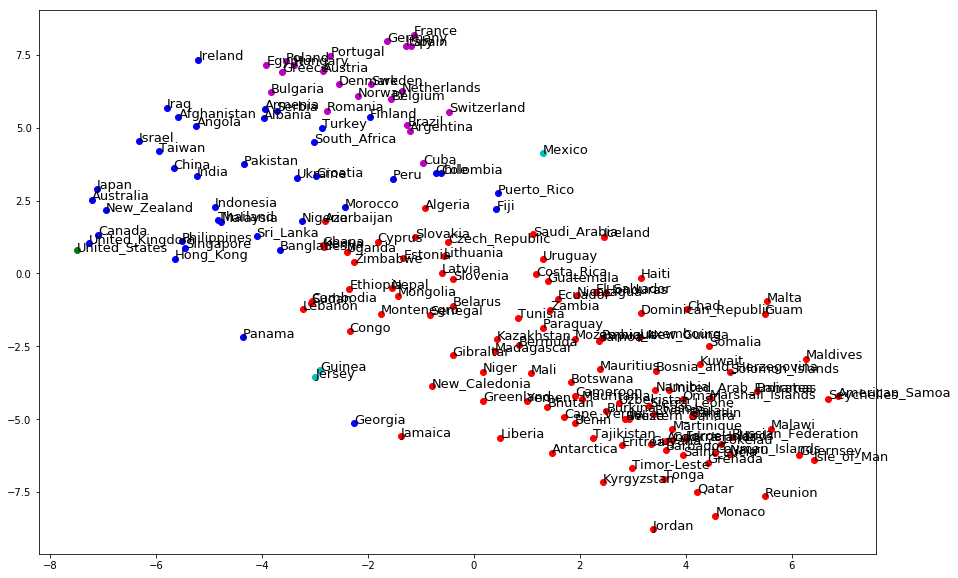

In [45]:
colors = ['b', 'g', 'r', 'c', 'm']
plt.figure(figsize=(15, 10))
for (x, y), label, name in zip(tsne, predict, country_vecs):
    plt.plot(x, y, 'o', color=colors[label])
    plt.annotate(name, (x, y), size=13)